<a href="https://colab.research.google.com/github/JuliethAE/TalentoTech/blob/main/LIMPIEZA_DE_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**LIMPIEZA DE DATOS**

# **El problema del negocio**


Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# **El set de datos**

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (dataset_banco.csv) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

### **1. IMPORTAR LIBRERIAS**

In [1]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **2. LECTURA**

In [2]:
#Lectura
from google.colab import drive
drive.mount ('/content/drive')
ruta = "/content/drive/MyDrive/Colab Notebooks/dataset_banco.xlsx"
data = pd.read_excel(ruta)

Mounted at /content/drive


In [3]:
print(data.shape)
data.head()

(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


## **3. VARIABLES CATEGORICAS Y NUMERICAS**

In [4]:
# Veamos las variables categoricas y las numericas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


## **4. DATOS FALTANTES**

In [5]:
data.dropna (inplace=True)
data.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


# **CONTEO DE LOS NIVELES EN LAS DIFERENTES COLUMNAS CATEGORICAS**

In [6]:
 #Conteo de los niveles en las diferentes columnas categoricas
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for col in cols_cat:
  print(f'Columna: {col}: {data[col].nunique()} subniveles')

Columna: job: 18 subniveles
Columna: marital: 6 subniveles
Columna: education: 10 subniveles
Columna: default: 2 subniveles
Columna: housing: 2 subniveles
Columna: loan: 6 subniveles
Columna: contact: 5 subniveles
Columna: month: 12 subniveles
Columna: poutcome: 6 subniveles
Columna: y: 2 subniveles


In [7]:
data.describe ()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# **CONTEO DE VALORES CON -1**

In [8]:
#conteo de valores con -1
count = data['pdays'].value_counts()[-1]

print(count)

36953


# **CALCULAR LA MEDIA**

In [9]:
# Calcula la media del atributo "pdays: dias de contacto al usuario antes de la campaña actual"
media = data ['pdays'].mean()
print("Promedio de dias de contacto:",media)

Promedio de dias de contacto: 40.17822461123277


# **HISTOGRAMA CON MEDIA**

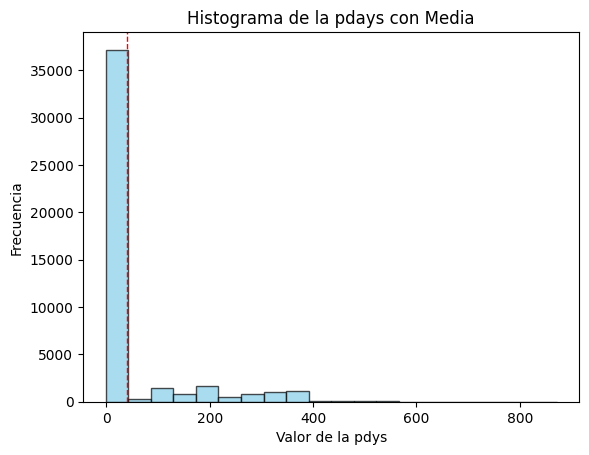

In [10]:
#Graficar un histograma del atributo "pdays"
plt.hist(data['pdays'], bins=20, color='skyblue',edgecolor='black', alpha=0.7)

#Agregar una linea vertical para mostrar la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

#Etiquetas y titulo
plt.xlabel('Valor de la pdys')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con Media')

#Mostrar la gráfica
plt.show()

# **CALCULAR LA DESVIACIÓN ESTANDAR**

In [11]:
#Calcula la desviación estandar del atributo "pdays"
desviacion_estandar = data['pdays'].std()
print("Desviación estandár de la pdays:", desviacion_estandar)

Desviación estandár de la pdays: 100.10328306134589


# **HISTOGRAMA CON DESVIACIÓN ESTANDAR**

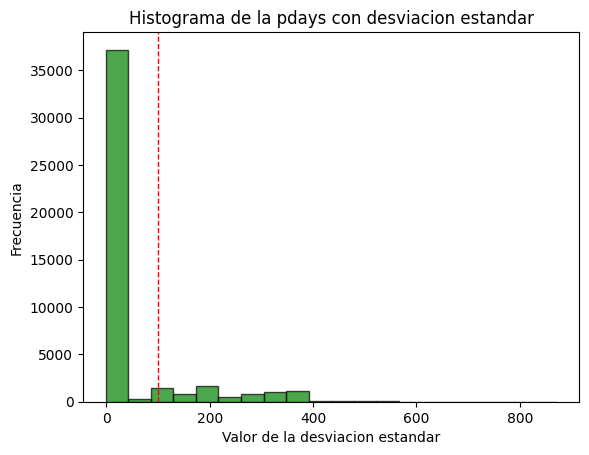

In [12]:
# Graficar un histograma de la std del atriburo pdays
plt.hist(data['pdays'], bins=20, color='green', edgecolor='black', alpha=0.7)

# Agregar una linea vertical para obtener la std
plt.axvline(desviacion_estandar, color='red', linestyle='dashed', linewidth=1) # Se reemplaza media por std seguido del comando "plt.axvline" para graficar la desviacion estandar y no la media

# Etiquetas y titulo
plt.xlabel('Valor de la desviacion estandar')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con desviacion estandar')

# Mostrar la grafica
plt.show()

In [13]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


# **FILAS REPETIDAS**

In [14]:
#Mostramos la cantidad de registros antes de aplicar la transformación, limpieza o filtro
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
#Mostramos la cantidad de registros después de aplicar la transformación, limpieza o filtro
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45207, 17)
Tamaño del set después de eliminar las filas repetidas: (45203, 17)


# **ELIMINAR FILAS**

In [15]:
#Eliminar filas con "age">100
print(f'Tamaño del set antes de eliminar registros de edad:{data.shape}')
data = data.drop(data[data['age']>100].index)
#data = data[data['age']<=100] 45203
print(f'Tamaño del set después de elimminar registros de edad:{data.shape}')

Tamaño del set antes de eliminar registros de edad:(45203, 17)
Tamaño del set después de elimminar registros de edad:(45195, 17)


# **GRAFICAS INDIVIDUALES**

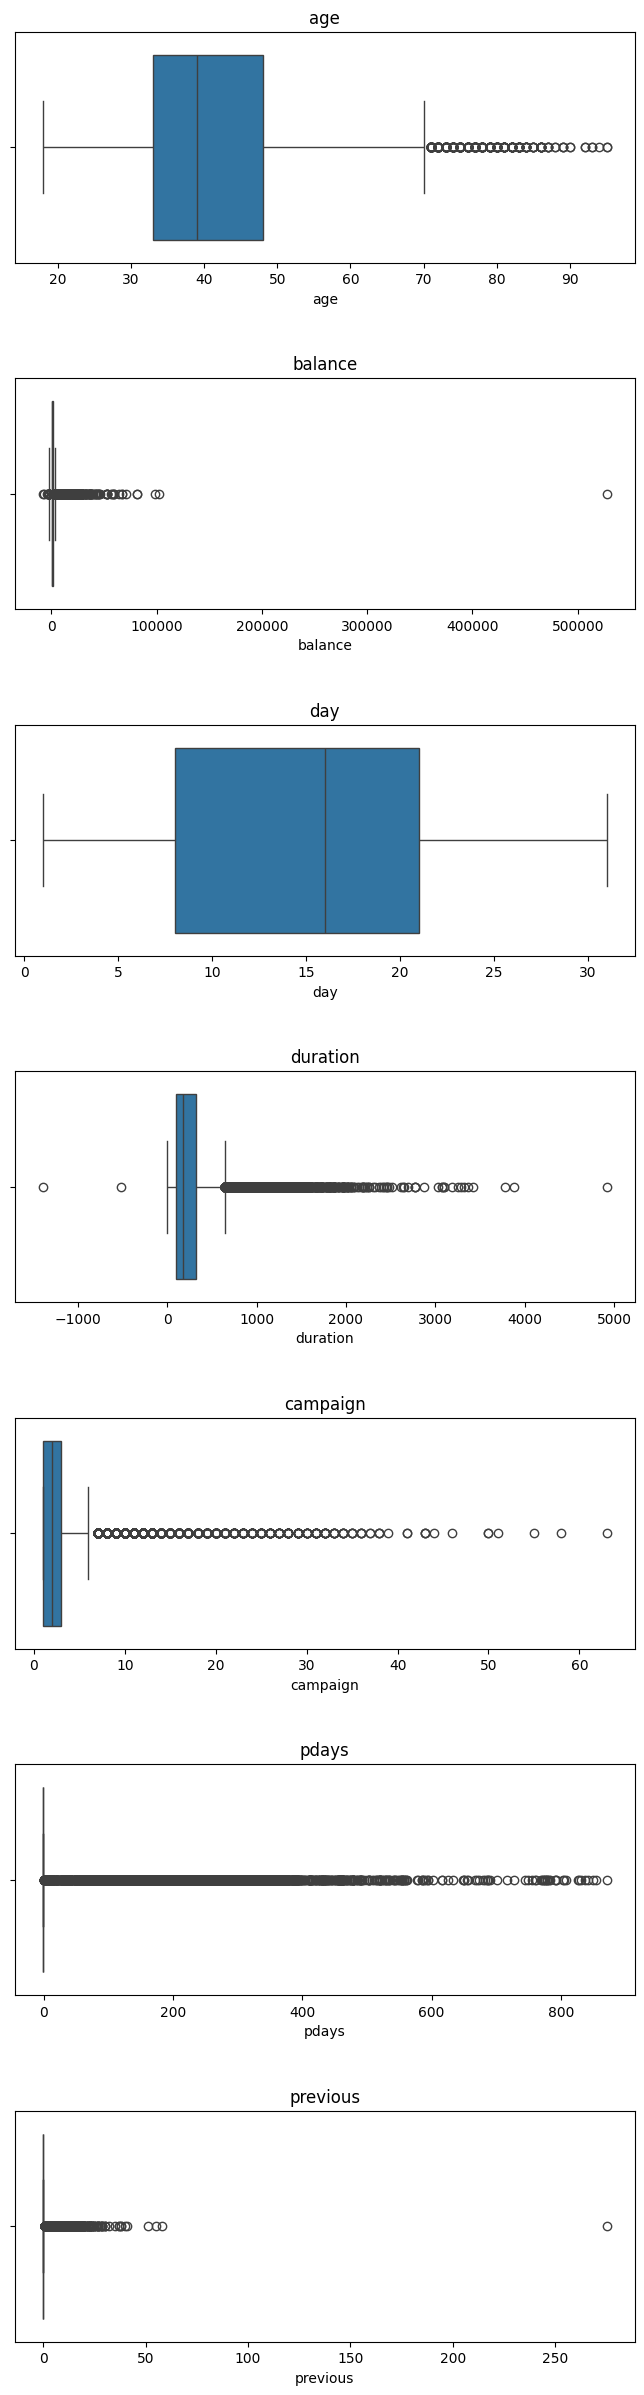

In [16]:
#Generar gráficas individuales pues las variables numéricas
#estan en rangos diferentes
cols_num = ['age','balance','day','duration','campaign','pdays','previous']

fig,ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
  sns.boxplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)


# **OBSERVACIONES**


*   "age" Hay sujetos con edades mayores a 100 años
*   "duration" Hay valores negativos
*   "previous" Hay un valor extremadamente alto (cercano a 300)

In [17]:

# Eliminar filas con "age" > 100

print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data.drop(data[data['age'] > 100].index)
print(f'Tamaño del set despues de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (45195, 17)
Tamaño del set despues de eliminar registros de edad: (45195, 17)


In [18]:
# Eliminar valores negativos en duartion

print(f'Tamaño del set antes de eliminar valores negativos en duration: {data.shape}')
data = data.drop(data[data['duration'] < 0].index)
print(f'Tamaño del set despues de eliminar valores negativos en duration: {data.shape}')

Tamaño del set antes de eliminar valores negativos en duration: (45195, 17)
Tamaño del set despues de eliminar valores negativos en duration: (45193, 17)


In [19]:
# Eliminar valores de previous mayores a 100

print(f'Tamaño del set antes de eliminar valores mayores a 100 en previous: {data.shape}')
data = data.drop(data[data['previous'] >= 100].index)
print(f'Tamaño del set despues de eliminar valores mayores a 100 en previos: {data.shape}')

Tamaño del set antes de eliminar valores mayores a 100 en previous: (45193, 17)
Tamaño del set despues de eliminar valores mayores a 100 en previos: (45192, 17)


# **GRAFICA SUBNIVELES DE CADA VARIABLE**

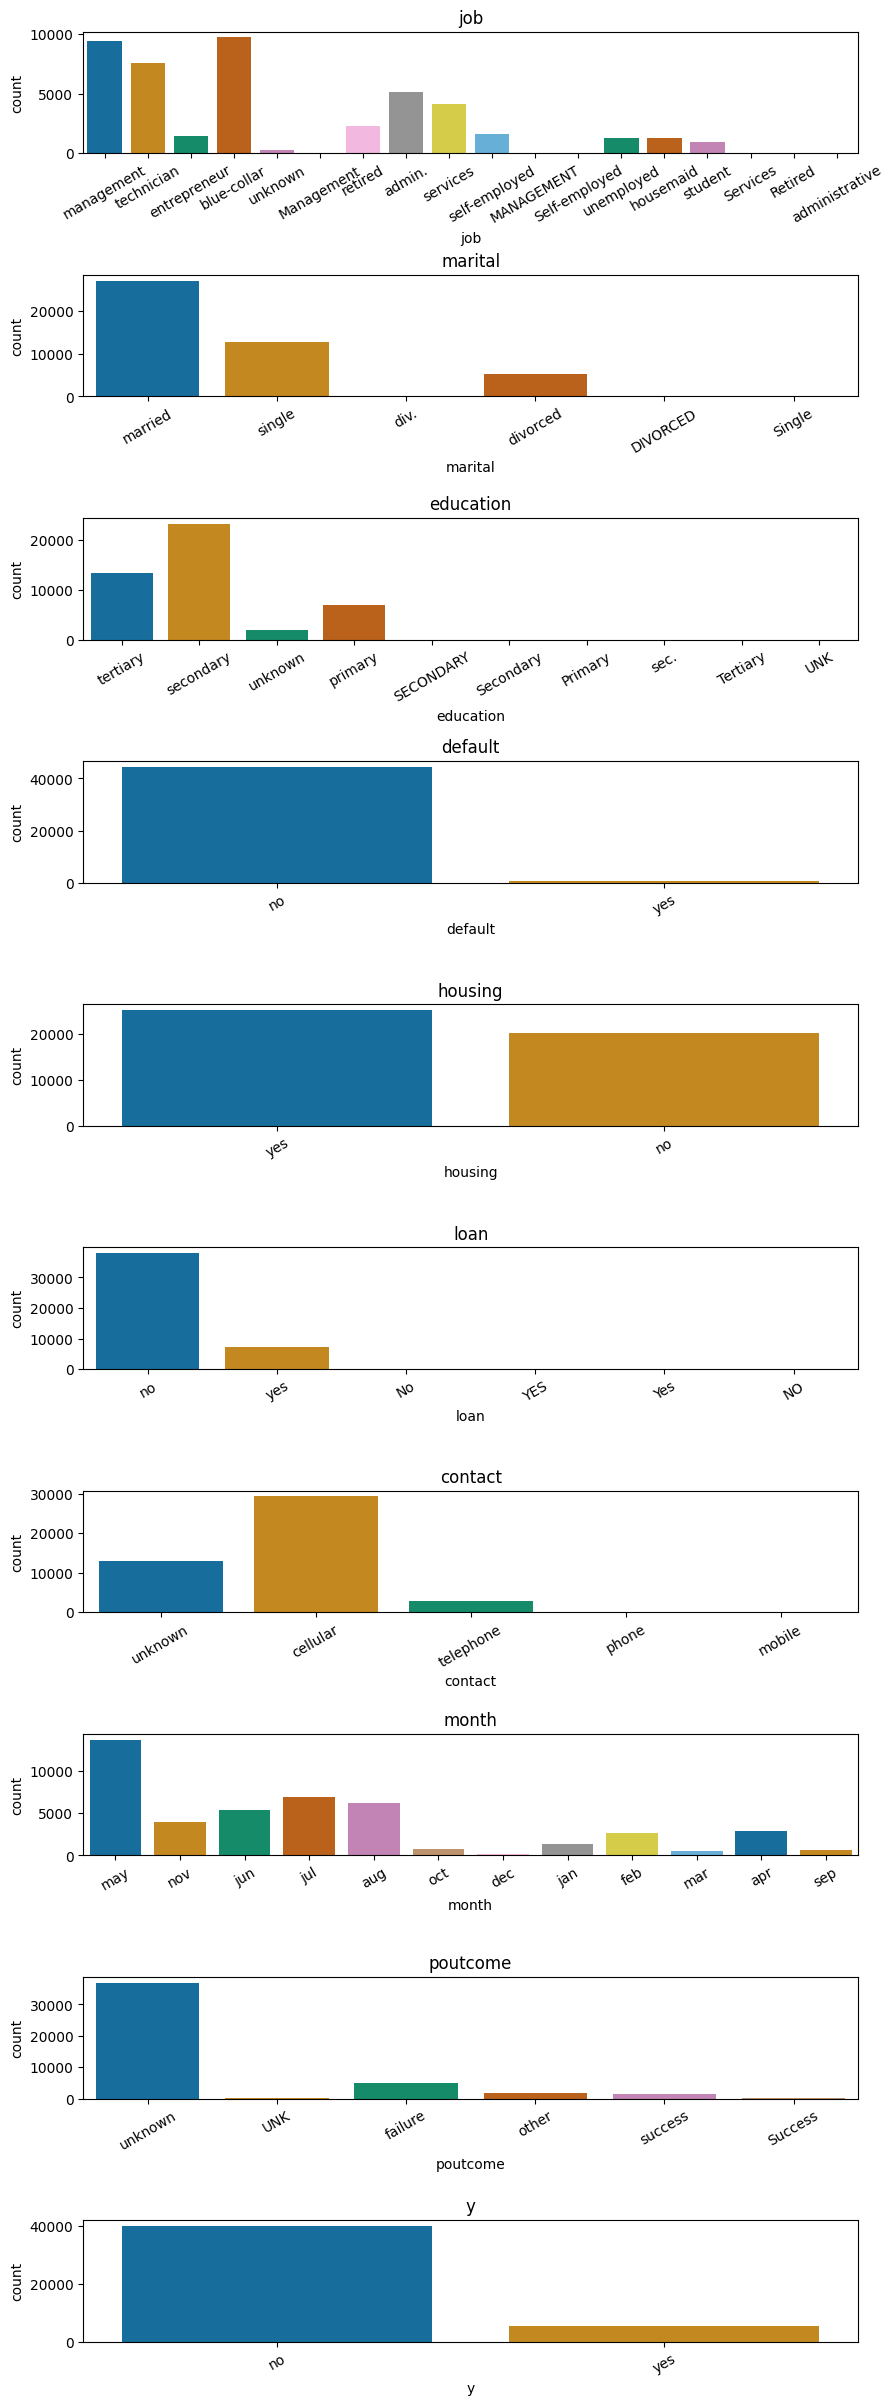

In [20]:
# Graficar los subniveles de cada variable categórica

cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, hue=col,  data=data, ax=ax[i], palette = 'colorblind', legend=False)
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', labelrotation = 30)

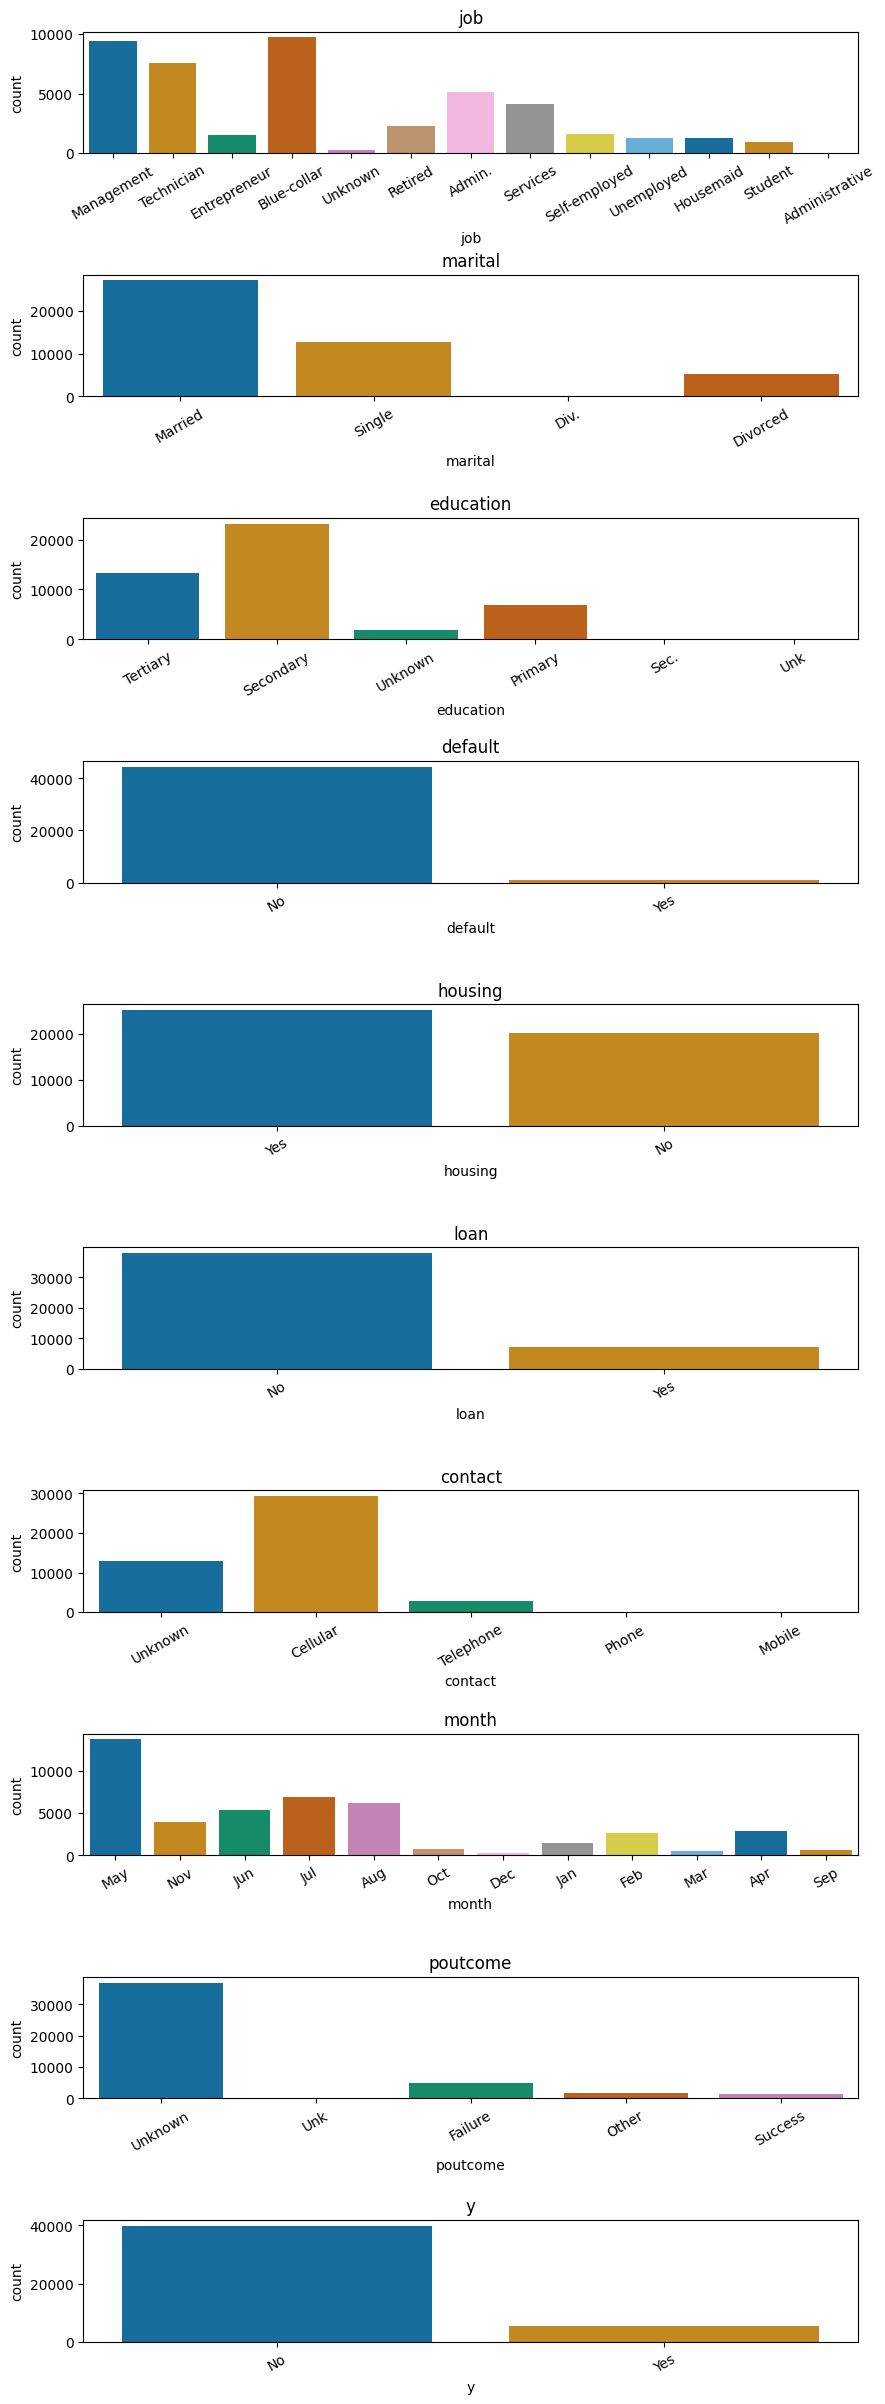

In [21]:
for column in data.columns:
  # Representar en minusculas y primera en mayuscula solo si la columna es categórica
  if column in cols_cat:
    data[column] = data [column].str.capitalize()

  #Graficar nuevamente

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, hue=col,  data=data, ax=ax[i], palette = 'colorblind', legend=False)
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', labelrotation = 30)


In [22]:
# job unificar Admin. y Administrative
print (data['job'].unique())
data['job'] = data['job'].str.replace('Admin.', 'Administrative', regex=False)
print (data['job'].unique())

['Management' 'Technician' 'Entrepreneur' 'Blue-collar' 'Unknown'
 'Retired' 'Admin.' 'Services' 'Self-employed' 'Unemployed' 'Housemaid'
 'Student' 'Administrative']
['Management' 'Technician' 'Entrepreneur' 'Blue-collar' 'Unknown'
 'Retired' 'Administrative' 'Services' 'Self-employed' 'Unemployed'
 'Housemaid' 'Student']


In [23]:
# marital unificar Div. y Divorced
print (data['marital'].unique())
data['marital'] = data['marital'].str.replace('Div.', 'Divorced', regex=False)
print (data['marital'].unique())

['Married' 'Single' 'Div.' 'Divorced']
['Married' 'Single' 'Divorced']


In [24]:
# education: unificar Sec. y secondary, Unk y unknown
print (data['education'].unique())
data['education'] = data['education'].str.replace('Sec.', 'Secondary', regex=False)
data.loc[data['education'] == 'Unk','education'] = 'Unknown'
print(data['education'].unique())

['Tertiary' 'Secondary' 'Unknown' 'Primary' 'Sec.' 'Unk']
['Tertiary' 'Secondary' 'Unknown' 'Primary']


In [25]:
# contac unificar unificar Telephone y Phone
print(data['contact'].unique())
data.loc[data['contact'] == 'Mobile','contact'] = 'Cellular'
data.loc[data['contact'] == 'Phone','contact'] = 'Telephone'
print(data['contact'].unique())

['Unknown' 'Cellular' 'Telephone' 'Phone' 'Mobile']
['Unknown' 'Cellular' 'Telephone']


In [26]:
# poutcome:  unificar Unk y Unknown
print(data['poutcome'].unique())
data.loc[data['poutcome'] == 'Unk', 'poutcome'] = 'Unknown'
print(data['poutcome'].unique())

['Unknown' 'Unk' 'Failure' 'Other' 'Success']
['Unknown' 'Failure' 'Other' 'Success']


In [27]:
data.shape

(45192, 17)

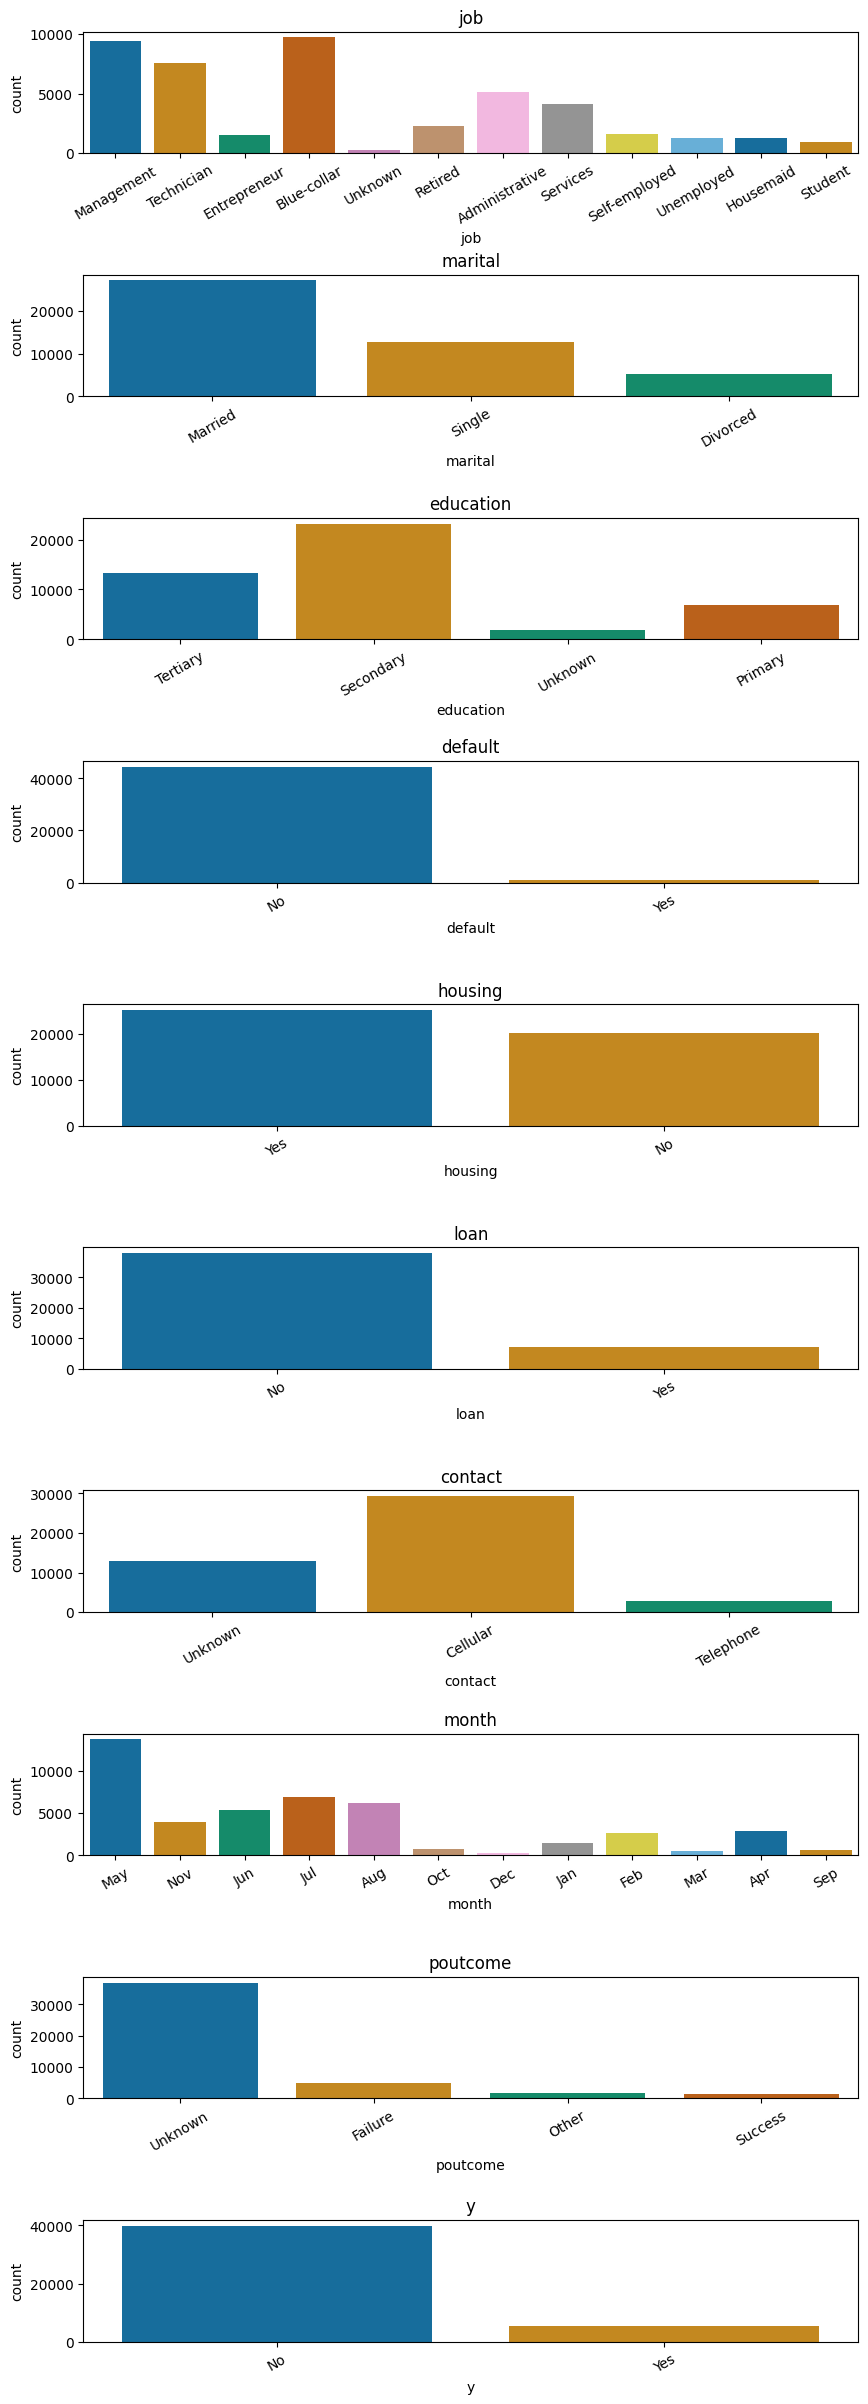

In [28]:
for column in data.columns:
  #Representar en minúsculas sólo si la columna es categórica
  if column is cols_cat:
    data [column] = data [column].str.lower()

#y generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, hue=col,  data=data, ax=ax[i], palette = 'colorblind', legend=False)
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', labelrotation = 30)

In [29]:
ruta = "/content/drive/MyDrive/Colab Notebooks/LIMPIEZA DE DATOS.csv"
data.to_csv(ruta, index=False)
